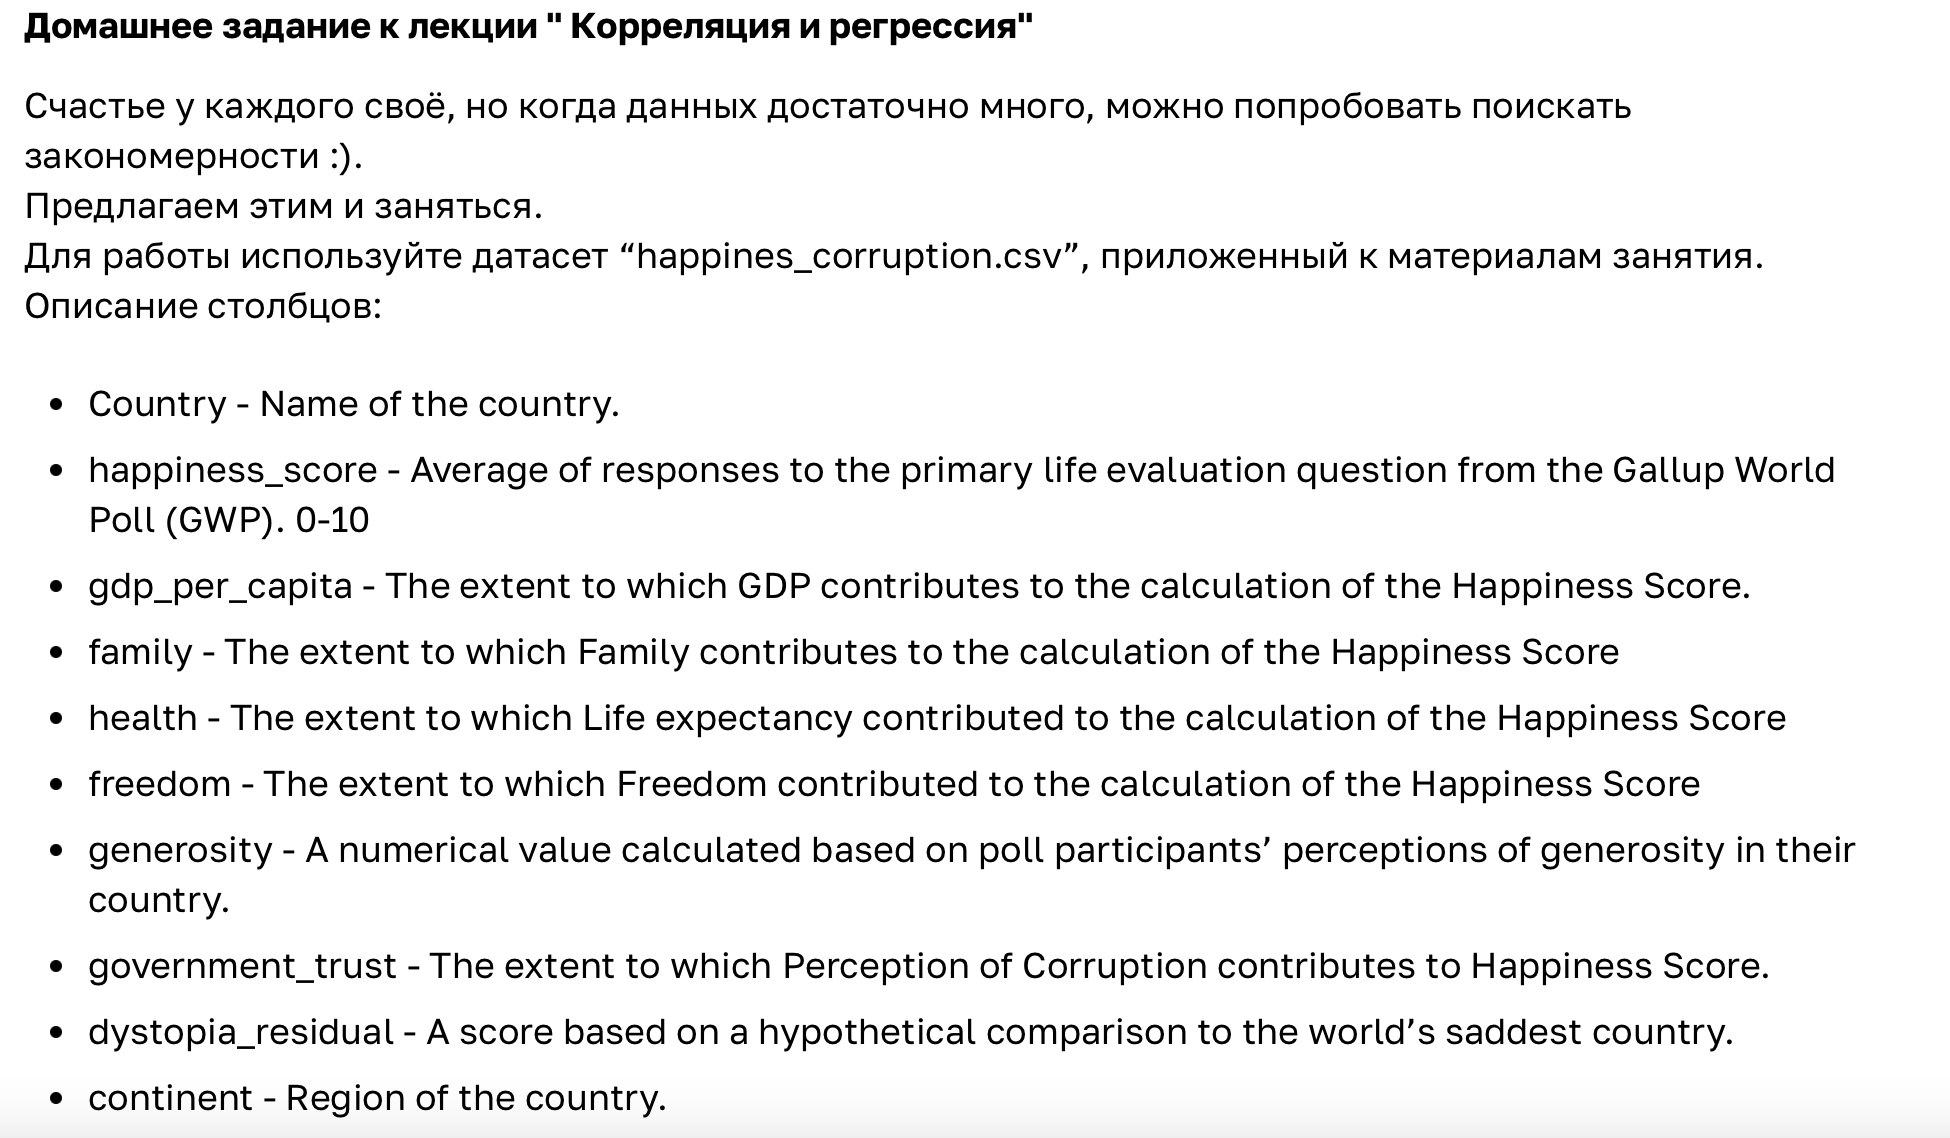

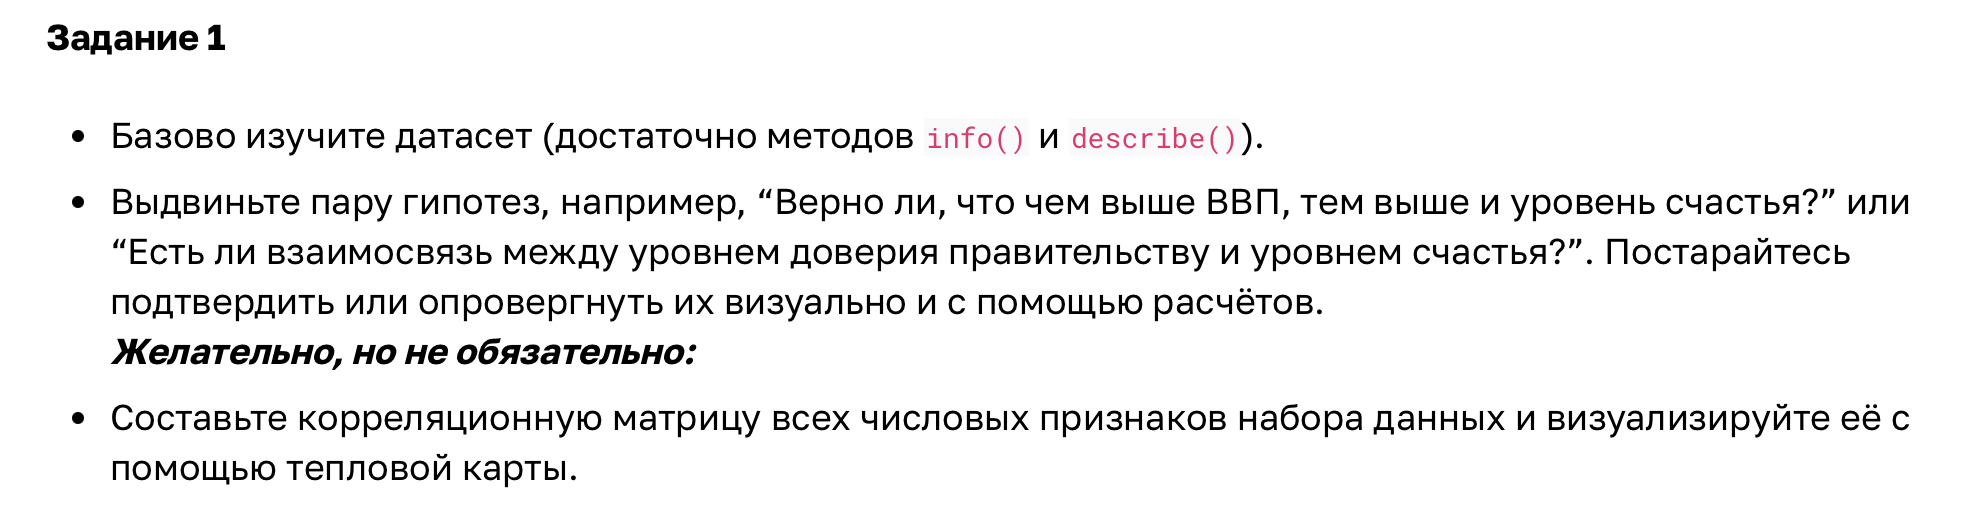

In [1]:
import pandas as pd

In [3]:
df_happiness = pd.read_csv('/content/happines_corruption.csv')
df_happiness.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [4]:
df_happiness.info()
#пропусков нет, типы данных у столбцов корректные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [5]:
df_happiness.describe()
#аномальных или некорректных значений при первичном анализе не наблюдается

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


**Гипотеза 1** - Чем выше ВВП, тем выше и уровень счастья

<Axes: title={'center': 'Диаграмма рассеяния для показателей уровней счастья и ВВП на душу населения'}, xlabel='Уровень счастья', ylabel='ВВП на душу населения'>

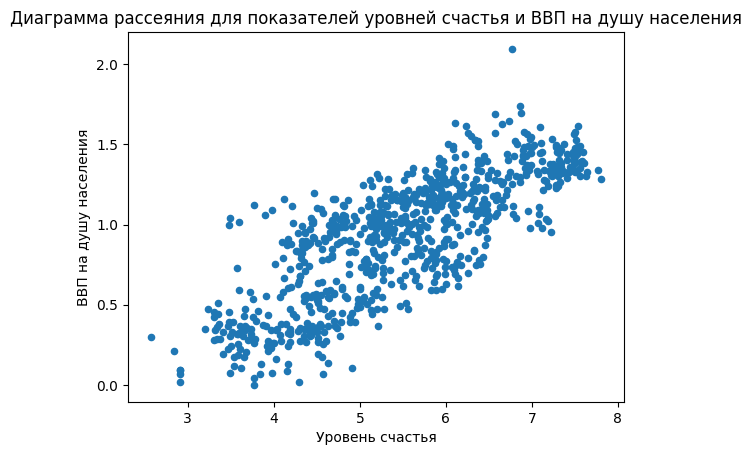

In [6]:
df_happiness.plot.scatter(x='happiness_score',
                          y='gdp_per_capita',
                          xlabel='Уровень счастья',
                          ylabel='ВВП на душу населения',
                          title='Диаграмма рассеяния для показателей уровней счастья и ВВП на душу населения')
#Есть довольно заметная положительная связь между уровнями ВВП и счастья

In [7]:
print('Коэффициент корреляции Пирсона')
print(df_happiness[['happiness_score', 'gdp_per_capita']].corr())
print('\n')

print('Коэффициент корреляции Спирмена')
print(df_happiness[['happiness_score', 'gdp_per_capita']].corr(method='spearman'))
print('\n')

print('Коэффициент корреляции Кенделла')
print(df_happiness[['happiness_score', 'gdp_per_capita']].corr(method='kendall'))

#Коэффициенты корреляции Пирсона и Спирмена подтверждают высокую положительную связь (>0,7) двух переменных

Коэффициент корреляции Пирсона
                 happiness_score  gdp_per_capita
happiness_score         1.000000        0.793267
gdp_per_capita          0.793267        1.000000


Коэффициент корреляции Спирмена
                 happiness_score  gdp_per_capita
happiness_score         1.000000        0.796952
gdp_per_capita          0.796952        1.000000


Коэффициент корреляции Кенделла
                 happiness_score  gdp_per_capita
happiness_score          1.00000         0.59684
gdp_per_capita           0.59684         1.00000


**Гипотеза 2** - Чем выше уровень доверия правительству, тем выше и уровень счастья

<Axes: title={'center': 'Диаграмма рассеяния для показателей уровней счастья и доверия правительству'}, xlabel='Уровень счастья', ylabel='Уровень доверия правительству'>

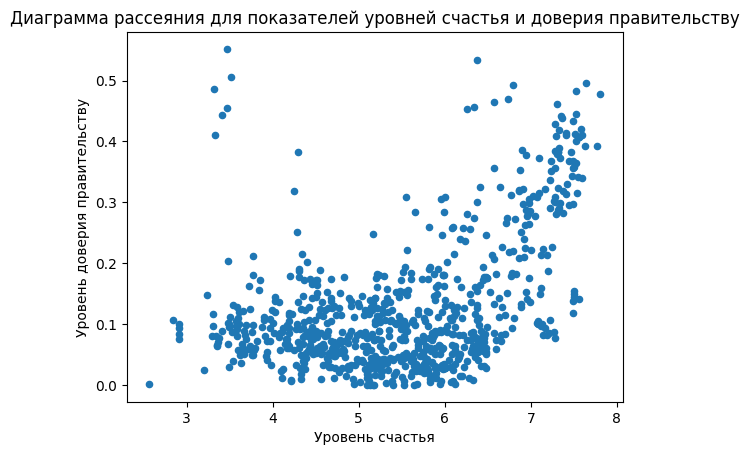

In [8]:
df_happiness.plot(kind='scatter',
                  x='happiness_score',
                  y='government_trust',
                  xlabel='Уровень счастья',
                  ylabel='Уровень доверия правительству',
                  title='Диаграмма рассеяния для показателей уровней счастья и доверия правительству')
#Коррелляционная связь до определенного уровня кажется незначительной (слабой).
#Только при высоких показателях уровня счастья начинает прослеживаться положительная связь с уровнем доверия правительству

In [9]:
print('Коэффициент корреляции Пирсона')
print(df_happiness[['happiness_score', 'government_trust']].corr())
print('\n')

print('Коэффициент корреляции Спирмена')
print(df_happiness[['happiness_score', 'government_trust']].corr(method='spearman'))
print('\n')

print('Коэффициент корреляции Кенделла')
print(df_happiness[['happiness_score', 'government_trust']].corr(method='kendall'))


#Коэффициенты корреляции Пирсона и Спирмена подтверждают слабую положительную связь (<0,5) двух переменных

Коэффициент корреляции Пирсона
                  happiness_score  government_trust
happiness_score          1.000000          0.455477
government_trust         0.455477          1.000000


Коэффициент корреляции Спирмена
                  happiness_score  government_trust
happiness_score          1.000000          0.351135
government_trust         0.351135          1.000000


Коэффициент корреляции Кенделла
                  happiness_score  government_trust
happiness_score          1.000000          0.234573
government_trust         0.234573          1.000000


**Гипотеза 3** - Чем дольше продолжительность жизни, тем выше и уровень счастья

<Axes: title={'center': 'Диаграмма рассеяния для показателей уровней счастья и продолжительности жизни'}, xlabel='Уровень счастья', ylabel='Доля влияния продолжительности жизни на уровень счастья'>

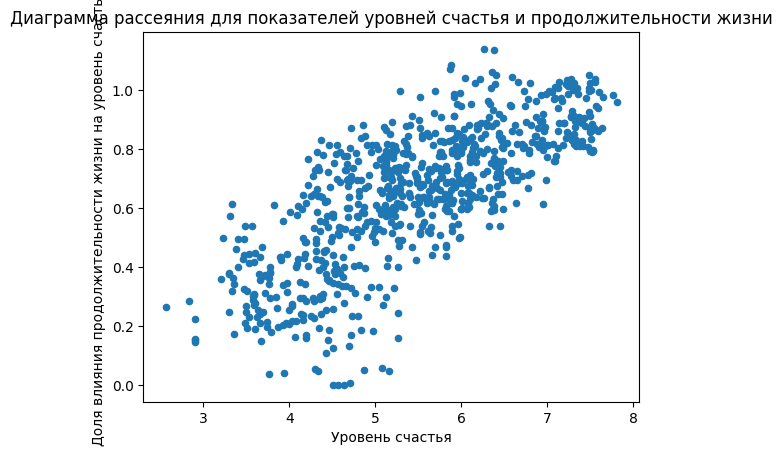

In [10]:
df_happiness.plot(kind='scatter',
                  x='happiness_score',
                  y='health',
                  xlabel='Уровень счастья',
                  ylabel='Доля влияния продолжительности жизни на уровень счастья',
                  title='Диаграмма рассеяния для показателей уровней счастья и продолжительности жизни')
#Есть довольно заметная положительная связь между продолжительностью жизни и уровнем счастья

In [11]:
print('Коэффициент корреляции Пирсона')
print(df_happiness[['happiness_score', 'health']].corr())
print('\n')

print('Коэффициент корреляции Спирмена')
print(df_happiness[['happiness_score', 'health']].corr(method='spearman'))
print('\n')

print('Коэффициент корреляции Кенделла')
print(df_happiness[['happiness_score', 'health']].corr(method='kendall'))

#Коэффициенты корреляции Пирсона и Спирмена подтверждают высокую положительную связь (>0,7) двух переменных

Коэффициент корреляции Пирсона
                 happiness_score    health
happiness_score         1.000000  0.753534
health                  0.753534  1.000000


Коэффициент корреляции Спирмена
                 happiness_score    health
happiness_score         1.000000  0.765699
health                  0.765699  1.000000


Коэффициент корреляции Кенделла
                 happiness_score    health
happiness_score         1.000000  0.558883
health                  0.558883  1.000000


**Тепловая карта корреляции**

In [12]:
df_happiness_copy = df_happiness.copy()

In [13]:
df_happiness_copy.drop(['Country', 'continent', 'Year'], axis=1, inplace=True)

In [14]:
df_happiness_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   happiness_score    792 non-null    float64
 1   gdp_per_capita     792 non-null    float64
 2   family             792 non-null    float64
 3   health             792 non-null    float64
 4   freedom            792 non-null    float64
 5   generosity         792 non-null    float64
 6   government_trust   792 non-null    float64
 7   dystopia_residual  792 non-null    float64
 8   social_support     792 non-null    float64
 9   cpi_score          792 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 62.0 KB


In [15]:
# Считаем коэффициенты корреляции между всеми показателями
df_happiness_copy.corr()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,-0.654570,0.032630
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,1.000000,0.109077
cpi_score,0.693001,0.704483,0.132031,0.644478,0.482923,0.165972,0.620089,0.032630,0.109077,1.000000


<Axes: >

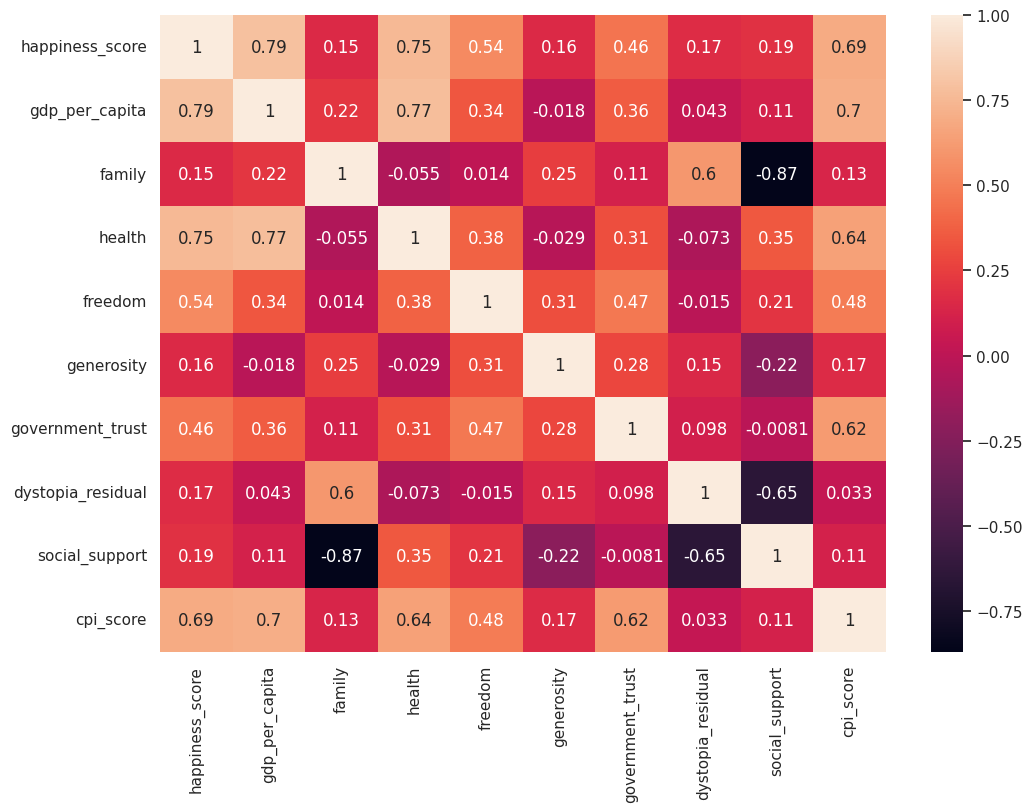

In [16]:
# Составляем тепловую карту
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_happiness_copy.corr(), annot=True)

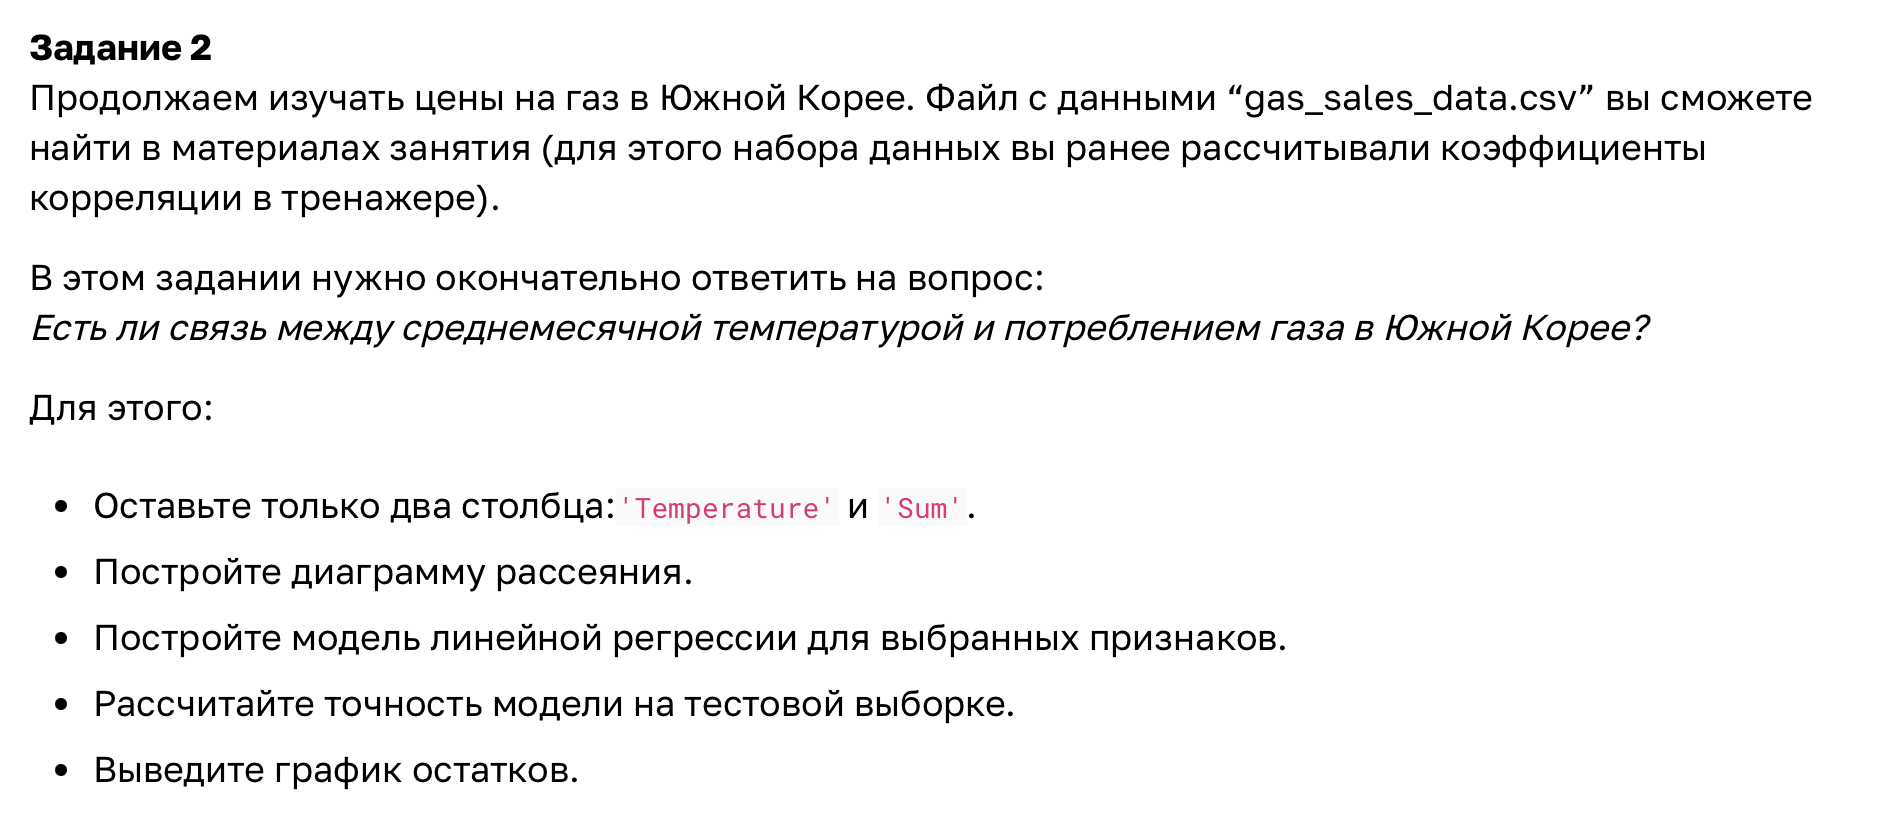

In [17]:
gas_sales_data = pd.read_csv('/content/gas_sales_data.csv')
gas_sales_data.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [18]:
df_gas_sales_data = gas_sales_data[['Temperature', 'Sum']]
df_gas_sales_data.head()

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248


<Axes: title={'center': 'Диаграмма рассеяния для показателей температуры и потребления газа'}, xlabel='Среднемесячная температура', ylabel='Потребление газа'>

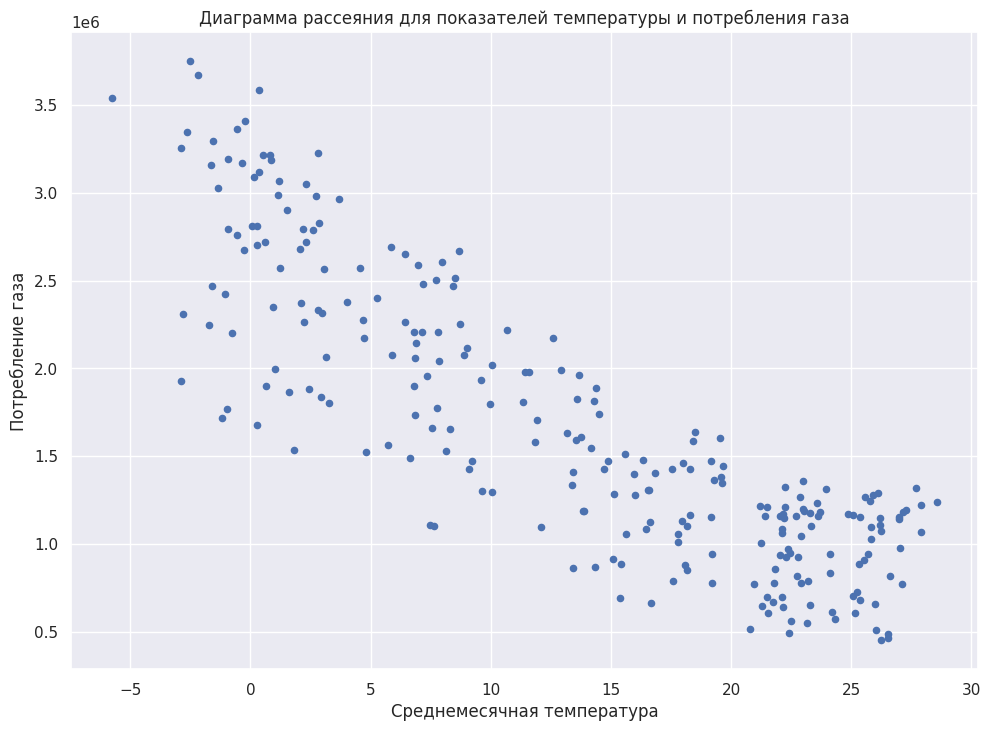

In [19]:
df_gas_sales_data.plot.scatter(x='Temperature',
                               y='Sum',
                               xlabel='Среднемесячная температура',
                               ylabel='Потребление газа',
                               title='Диаграмма рассеяния для показателей температуры и потребления газа')

In [36]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [21]:
X = df_gas_sales_data[['Temperature']]
Y = df_gas_sales_data['Sum']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [24]:
X_train.shape

(176, 1)

In [25]:
Y_train.shape

(176,)

In [27]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, искуственно добавляем константу

In [28]:
X_const

,const,Temperature
239,1.0,2.74
84,1.0,1.23
29,1.0,22.16
168,1.0,0.54
167,1.0,1.14
...,...,...
106,1.0,8.30
14,1.0,5.73
92,1.0,21.79
179,1.0,-1.34


In [30]:
model = sm.OLS(Y_train, X_const) # OLS - Ordinary Least Squares
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.1
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.13e-49
Time:                        13:19:06   Log-Likelihood:                -2525.3
No. Observations:                 176   AIC:                             5055.
Df Residuals:                     174   BIC:                             5061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.572e+06   5.39e+04     47.695      

In [34]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

#Коэффициент детерминации 0.72 говорит о достаточно хорошей предсказательной силе модели (модель в целом неплохо отражает действительность)

Parameters:  const          2.571666e+06
Temperature   -6.918368e+04
dtype: float64
R2:  0.7157287338799033


Text(0, 0.5, 'Потребление газа')

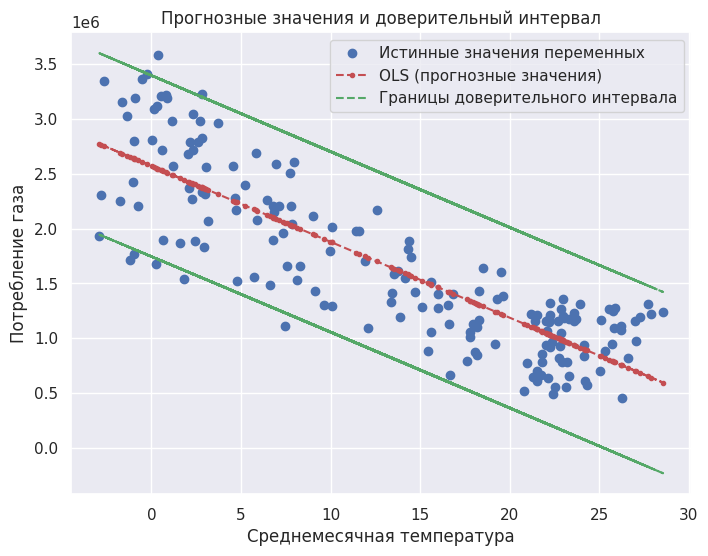

In [41]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
'''
prstd - standard error of prediction same length as rows of exog

iv_l, iv_u - lower und upper confidence bounds
'''

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], Y_train, 'o', label="Истинные значения переменных")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS (прогнозные значения)")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--', label="Границы доверительного интервала")
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')
plt.title('Прогнозные значения и доверительный интервал')
plt.xlabel('Среднемесячная температура')
plt.ylabel('Потребление газа')

Text(0, 0.5, 'Потребление газа')

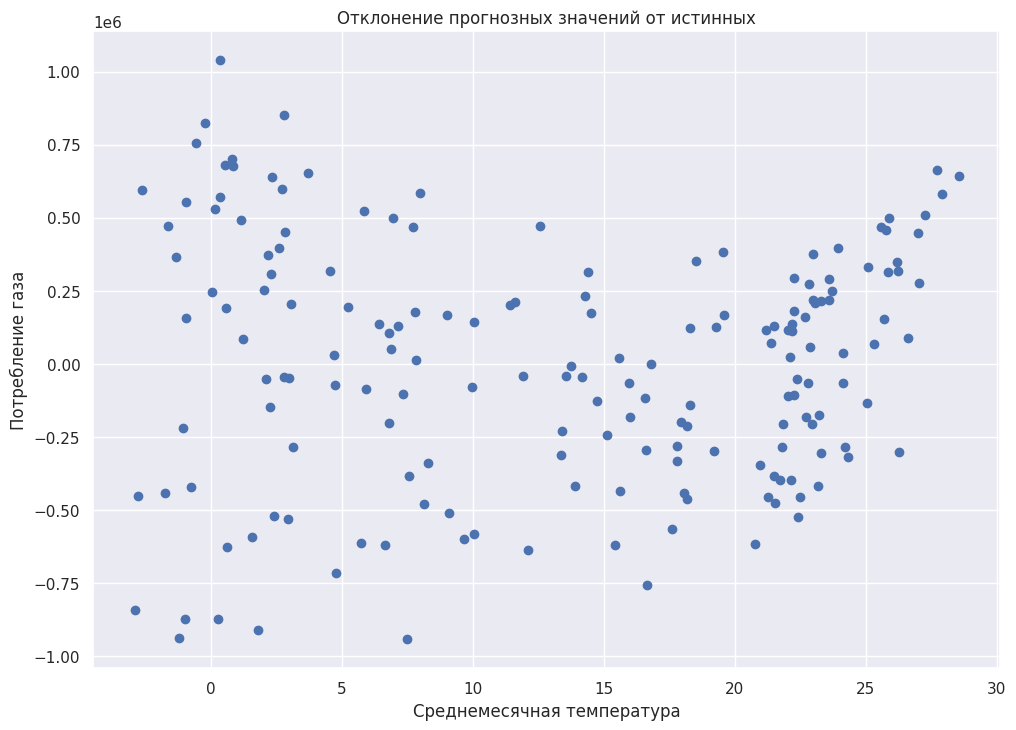

In [43]:
# Строим график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Отклонение прогнозных значений от истинных')
plt.xlabel('Среднемесячная температура')
plt.ylabel('Потребление газа')

Text(0, 0.5, 'Среднемесячная температура')

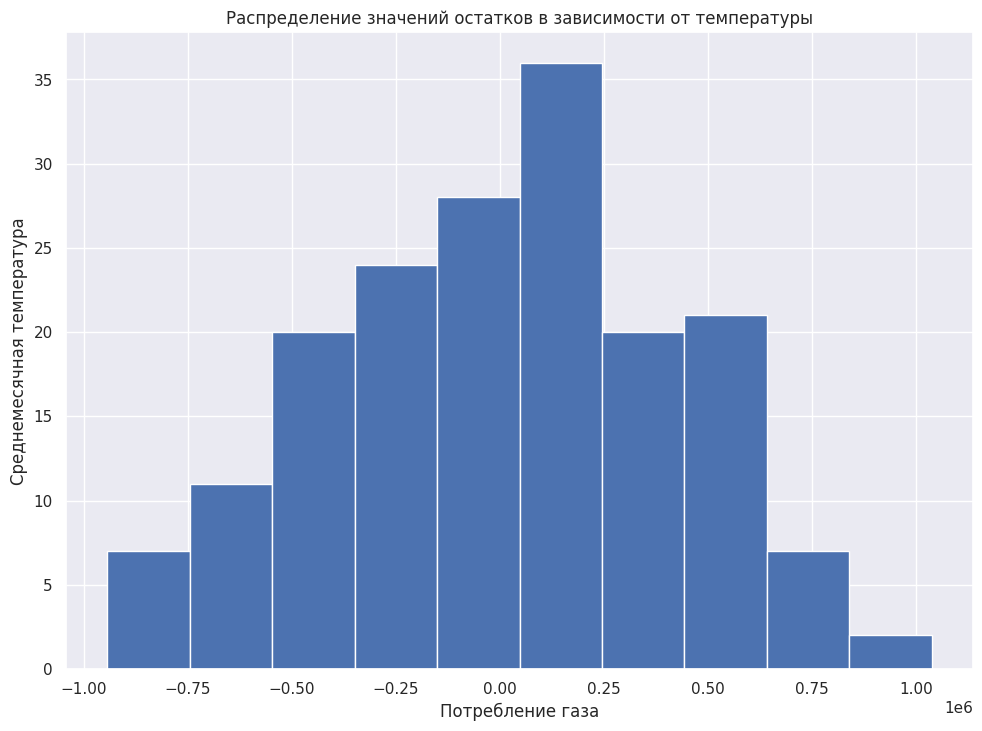

In [44]:
plt.hist(results.resid)
plt.title('Распределение значений остатков в зависимости от температуры')
plt.xlabel('Потребление газа')
plt.ylabel('Среднемесячная температура')


#Чем ниже температура, тем менее точный прогноз в части потребления газа даст модель)